In [ ]:
# Importing the libraries

import keras
from keras.datasets import fashion_mnist


from keras.layers import Dense 
from keras.models import Sequential 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Verifying the dataset shape

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [4]:
# Flatten the images

image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [5]:
# Converting to categorical values

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
classes = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
# Creating the model

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=64, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training the model

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=True, validation_split=.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 74us/step - loss: 1.0658 - accuracy: 0.6544 - val_loss: 0.7868 - val_accuracy: 0.6978
Epoch 2/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.7817 - accuracy: 0.7040 - val_loss: 0.7991 - val_accuracy: 0.6985
Epoch 3/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.7365 - accuracy: 0.7123 - val_loss: 0.7275 - val_accuracy: 0.7287
Epoch 4/10
54000/54000 [==============================] - 4s 71us/step - loss: 0.7211 - accuracy: 0.7269 - val_loss: 0.7152 - val_accuracy: 0.7307
Epoch 5/10
54000/54000 [==============================] - 4s 71us/step - loss: 0.7286 - accuracy: 0.7175 - val_loss: 0.6860 - val_accuracy: 0.7263
Epoch 6/10
54000/54000 [==============================] - 4s 70us/step - loss: 0.7095 - accuracy: 0.7169 - val_loss: 0.6833 - val_accuracy: 0.7143
Epoch 7/10
54000/54000 [==============================] - 4s 69us/st

In [9]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(accuracy)

0.6919999718666077


In [10]:
result = model.predict(x_test[0:10])

In [11]:
result[0]

array([2.1877382e-05, 4.5905683e-05, 2.1004589e-05, 7.0512498e-05,
       5.8994676e-05, 7.7714145e-02, 3.3501663e-05, 5.4971844e-01,
       1.9730933e-04, 3.7211829e-01], dtype=float32)

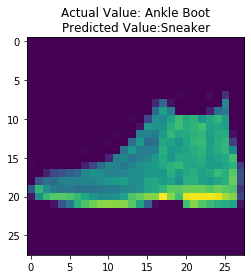

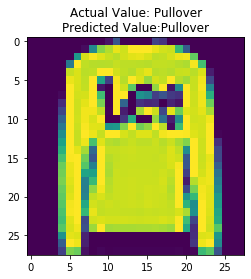

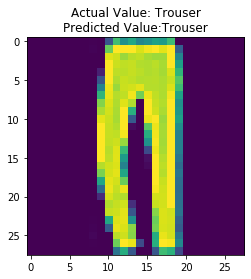

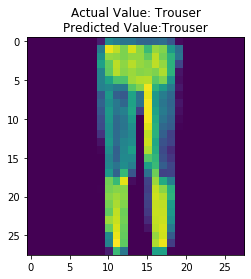

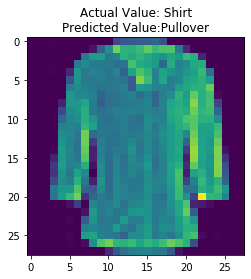

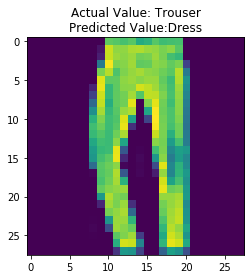

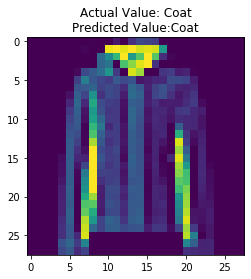

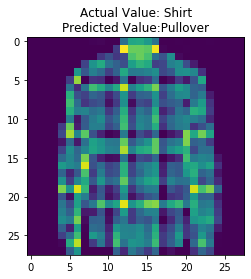

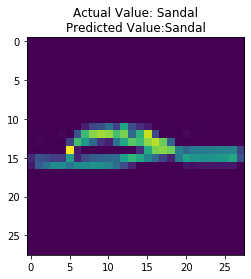

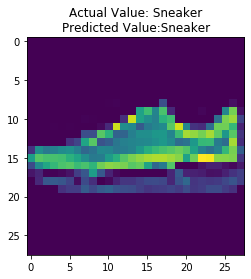

In [12]:
test = x_test[0:10].reshape(10, 28, 28)
for i in range(10):
    plt.figure()
    plt.title("Actual Value: " +  classes[np.argmax(y_test[i])] + "\n" + "Predicted Value:" + classes[np.argmax(result[i])])
    plt.imshow(test[i])